In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier

import helper
import text_embeddings
import performance
import models
import predict

# 1. Load data

In [2]:
x, y = helper.load_data()

# 2. Split data into train/test

In [3]:
x_train, x_test, y_train, y_test = helper.split_data(x, y)

# 3. Text embedding

In [4]:
x_train_features, x_test_features, vectorizer = text_embeddings.encode_tdfif(x_train, x_test, 'text')

# 4. Grid Search using 

-  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier
-  https://scikit-learn.org/stable/modules/kernel_approximation.html  

In [5]:
final_x_train = x_train_features['text']['data']
final_y_train = y_train

final_x_test = x_test_features['text']['data']
final_y_test = y_test

In [6]:
model_params = dict(eta0=0.0001,loss='hinge', random_state=15, penalty='l2', tol=1e-3, verbose=0)
model_class = SGDClassifier

In [7]:
%%time
import matplotlib.pyplot as plt
# from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint


alpha_range = [ 0.0001,0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10,50,100]

model = model_class(**model_params)

search_params = {'alpha' : alpha_range}
search = GridSearchCV(model,
                      search_params,
                      cv=5,
                      scoring="f1",
                     return_train_score=True)


search.fit(final_x_train, final_y_train)
results = pd.DataFrame.from_dict(search.cv_results_)
results = results.sort_values(['param_alpha'])
results['mean_train_score-mean_test_score'] = results['mean_train_score'] - results['mean_test_score']
results[['param_alpha','mean_train_score','mean_test_score', 'mean_train_score-mean_test_score']]

/Users/aneeshmakala/Documents/ComputerScience/datascience/venv_datascience/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


CPU times: user 20 s, sys: 1.62 s, total: 21.6 s
Wall time: 13.1 s


,param_alpha,mean_train_score,mean_test_score,mean_train_score-mean_test_score
0,0.0001,0.928729,0.920119,0.008610
1,0.001,0.874013,0.871768,0.002246
2,0.01,0.016937,0.016638,0.000300
3,0.1,0.000548,0.000325,0.000223
4,1,0.216872,0.215319,0.001553
5,2,0.263781,0.263230,0.000551
6,3,0.238686,0.238578,0.000107
7,4,0.237883,0.237877,0.000007
8,5,0.237882,0.237877,0.000005
9,6,0.237882,0.237877,0.000005


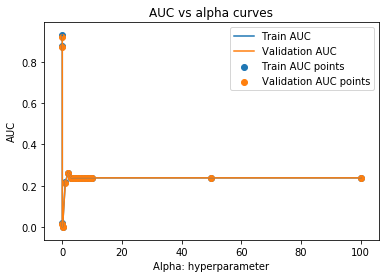

In [8]:
# Train
plt.plot(results['param_alpha'], results['mean_train_score'], label="Train AUC")
plt.scatter(results['param_alpha'], results['mean_train_score'], label="Train AUC points")

# Validation
plt.plot(results['param_alpha'], results['mean_test_score'], label="Validation AUC")
plt.scatter(results['param_alpha'], results['mean_test_score'], label="Validation AUC points")

plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC vs alpha curves")
plt.legend()
plt.show()

# 5. Prediction

In [9]:
alpha = 0.0001
final_model = model_class(alpha=alpha, **model_params)
final_model.fit(final_x_train, final_y_train)

final_y_train_pred = final_model.predict(final_x_train)
final_y_test_pred = final_model.predict(final_x_test)


# 7. Performance Measures

In [10]:
performance_measures = performance.get_performance_measures(final_model, final_x_test, final_y_test)
performance_measures

{'accuracy': 0.9330470904457709,
 'f1': 0.9189177763686325,
 'confusion_matrix':              actual_0  actual_1
 predicted_0     31721      1183
 predicted_1      2653     21737}

# Test

In [ ]:
predict.manual_test(final_model, 
                         model_id="SVM",
                         vectorizer=vectorizer)

In [12]:
test_results = predict.test_tweets_from_file(final_model,
                             "bot/tweets.json",
                             model_id="SVM",
                             vectorizer=vectorizer)

In [13]:
print(test_results['is_depressed(model output)'].value_counts())

0    133
1     73
Name: is_depressed(model output), dtype: int64


In [14]:
depressed_tweets = test_results[test_results['is_depressed(model output)'] == 1]

In [15]:
depressed_tweets.sort_values("model output probability (if any)", ascending=False).head(20)

,Text,is_depressed(model output),model output probability (if any)
91,This man has been an idiot for his entire life.,1,None
22,I wish it does because as of now i have hit th...,1,None
178,Life is simple but we choose to complicate it ...,1,None
21,LADbible blaming popcorn for nearly killing so...,1,None
19,@starfish_72 I have no doubt that you will hel...,1,None
174,What is life 😪,1,None
18,It's some Derren Brown mind shit. I physically...,1,None
14,Doctors don’t make you healthy. Teachers don’t...,1,None
172,Life is rough so you gotta be tough.,1,None
20,@acaucasianmom Ugh don't even get me started w...,1,None


# Future Work
- Explore string kernel https://github.com/timshenkao/StringKernelSVM
- word2vec using SVM (https://shop.tarjomeplus.com/UploadFileEn/TPLUS_EN_3959.pdf)
- https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/